 #   Libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


#     Load the Dataset

In [27]:
df = pd.read_csv("churn_dataset.csv")
print(df.head())

   customerID  gender  tenure        Contract  MonthlyCharges  TotalCharges  \
0  CUST100000    Male      63        One year           51.17       3206.56   
1  CUST100001  Female       2        One year           50.62           NaN   
2  CUST100002    Male      68             NaN          103.78       7046.77   
3  CUST100003    Male      22  Month-to-month           27.24        608.30   
4  CUST100004    Male      52        One year          108.11       5604.45   

      PaymentMethod Churn  
0     Bank transfer    No  
1     Bank transfer    No  
2      Mailed check    No  
3      Mailed check    No  
4  Electronic check   Yes  


# Missing Values and Information about the dataset


In [28]:
df.isnull().sum()

customerID         0
gender            90
tenure             0
Contract          90
MonthlyCharges    90
TotalCharges      90
PaymentMethod     90
Churn              0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      3000 non-null   object 
 1   gender          2910 non-null   object 
 2   tenure          3000 non-null   int64  
 3   Contract        2910 non-null   object 
 4   MonthlyCharges  2910 non-null   float64
 5   TotalCharges    2910 non-null   float64
 6   PaymentMethod   2910 non-null   object 
 7   Churn           3000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 187.6+ KB


In [30]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,2910.000000,2910.000000
mean,35.667000,69.265172,2495.943557
std,20.885725,28.450820,1895.244983
min,0.000000,20.010000,-19.550000
25%,17.750000,45.212500,955.882500
50%,35.000000,68.875000,2023.385000
75%,54.000000,93.340000,3700.927500
max,71.000000,119.950000,8483.940000


# Fill Missing Values / change the data types and create new dataset without any missing values

In [31]:
cleaned_csv = df

In [82]:
cleaned_csv["gender"] = cleaned_csv["gender"].fillna(cleaned_csv["gender"].mode()[0])


In [33]:
cleaned_csv['Contract'] = cleaned_csv['Contract'].fillna(cleaned_csv['Contract']=="Month-to-month")

In [34]:
cleaned_csv['MonthlyCharges'] = cleaned_csv['MonthlyCharges'].fillna(cleaned_csv['MonthlyCharges'].mean())

In [35]:
cleaned_csv['TotalCharges'] = cleaned_csv['TotalCharges'].fillna(cleaned_csv['TotalCharges'].mean())

In [36]:
cleaned_csv['PaymentMethod'] = cleaned_csv['PaymentMethod'].fillna(cleaned_csv['PaymentMethod']=="Credit Card")

# Cahange Churn "Yes" to 1 and "No" to 0

In [77]:
le = LabelEncoder()

cleaned_csv['Churn'] = le.fit_transform(cleaned_csv['Churn'].values)

# New Dataset

In [83]:
cleaned_csv.head()

,customerID,gender,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,Churn
0,CUST100000,Male,63,One year,51.17,3206.560000,Bank transfer,0
1,CUST100001,Male,2,One year,50.62,2495.943557,Bank transfer,0
2,CUST100002,Male,68,False,103.78,7046.770000,Mailed check,0
3,CUST100003,Male,22,Month-to-month,27.24,608.300000,Mailed check,0
4,CUST100004,Male,52,One year,108.11,5604.450000,Electronic check,1


# convert all male from gender to both male and female

In [87]:
raw = pd.read_csv("churn_dataset.csv")   # your original file
cleaned_csv["gender"] = raw["gender"]   # restore correct gender values
cleaned_csv["gender"] = cleaned_csv["gender"].fillna(cleaned_csv["gender"].mode()[0])

In [89]:
cleaned_csv.isnull().sum()

customerID        0
gender            0
tenure            0
Contract          0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
Churn             0
dtype: int64

In [80]:
cleaned_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      3000 non-null   object 
 1   gender          3000 non-null   object 
 2   tenure          3000 non-null   int64  
 3   Contract        3000 non-null   object 
 4   MonthlyCharges  3000 non-null   float64
 5   TotalCharges    3000 non-null   float64
 6   PaymentMethod   3000 non-null   object 
 7   Churn           3000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 187.6+ KB


In [69]:
cleaned_csv.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,35.667000,69.265172,2495.943557,0.272333
std,20.885725,28.020664,1866.590208,0.445235
min,0.000000,20.010000,-19.550000,0.000000
25%,17.750000,45.707500,988.712500,0.000000
50%,35.000000,69.265172,2101.280000,0.000000
75%,54.000000,92.595000,3634.515000,1.000000
max,71.000000,119.950000,8483.940000,1.000000


# EDA (Exploratory Data Analysis) 

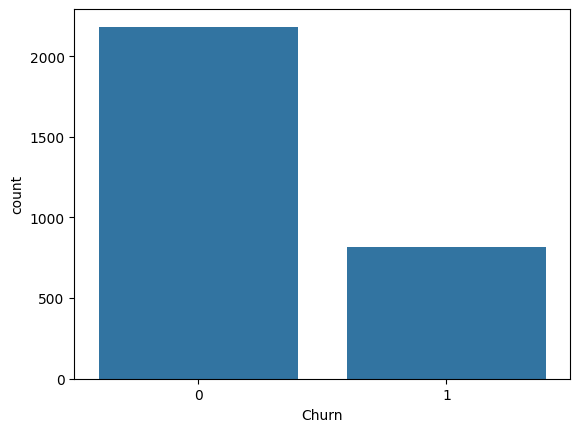

In [70]:
sns.countplot(data=cleaned_csv,x='Churn')
plt.show()

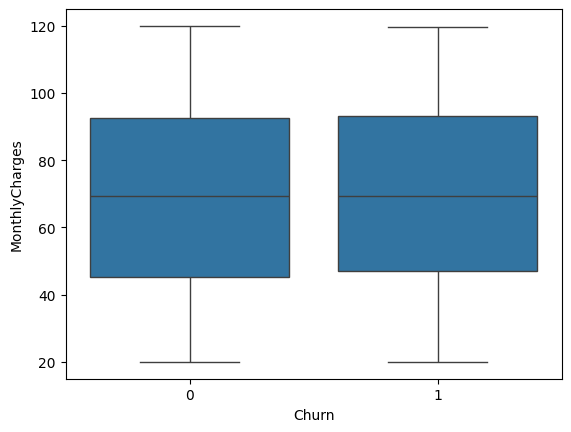

In [71]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.show()

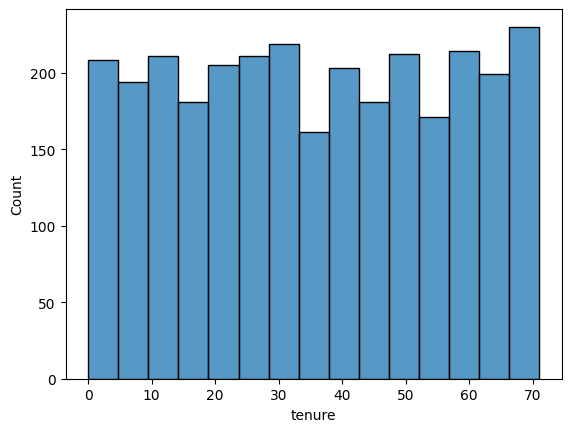

In [72]:
sns.histplot(df['tenure'])
plt.show()

# Create model and One hot Encoding

In [73]:
x = cleaned_csv.drop(['Churn','customerID'],axis=1)
y = cleaned_csv['Churn']

categorical_cols = x.select_dtypes(include=['object']).columns
x = pd.get_dummies(x,columns = categorical_cols,drop_first=True)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [74]:
accuracy = accuracy_score(y_pred,y_test)
report = classification_report(y_pred,y_test)
print("accuracy: ",accuracy)
print("Classification report: ",report)

accuracy:  0.67
Classification report:                precision    recall  f1-score   support

           0       0.87      0.73      0.79       524
           1       0.13      0.28      0.17        76

    accuracy                           0.67       600
   macro avg       0.50      0.50      0.48       600
weighted avg       0.78      0.67      0.72       600



# Save the Cleaned csv

In [90]:
cleaned_csv.to_csv("cleaned_churn.csv", index=False)
print("cleaned_churn.csv file saved successfully!")


cleaned_churn.csv file saved successfully!
